In [1]:
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# change plotting parameters
sns.set_style('darkgrid')

C:\Users\sangfrois\Documents\Computation\Anaconda3\envs\sangfroisEnv\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = [15, 5]  # Bigger images
plt.rcParams['font.size'] = 12

In [4]:
data, sampling_rate = nk.read_acqknowledge('C:/Users/sangfrois/Desktop/NeuroMod_tests/mockExperiment/biopac_test_2019-07-03_sub3_sangfrois.acq', sampling_rate=1000)

In [5]:
data.head()

,GSR-EDA100C-MRI,PPG100C,ECG100C,TTL,"Custom, HLT100C - A 6"
0,19.267274,0.023499,0.044861,-0.000610,0.279541
1,19.262696,0.024109,0.054474,-0.000610,0.279236
2,19.267274,0.024414,0.067444,-0.001221,0.281982
3,19.264222,0.024719,0.081635,-0.000610,0.283813
4,19.262696,0.025635,0.100250,-0.000305,0.281677


In [6]:
bio_df, bio_info = nk.bio_process(ecg=data['ECG100C'], rsp=data['Custom, HLT100C - A 6'], sampling_rate=1000)

In [7]:
analysis = nk.ecg_analyze(bio_df)

In [8]:
analysis

,ECG_Rate_Mean,ECG_HRV_RMSSD,ECG_HRV_MeanNN,ECG_HRV_SDNN,ECG_HRV_SDSD,ECG_HRV_CVNN,ECG_HRV_CVSD,ECG_HRV_MedianNN,ECG_HRV_MadNN,ECG_HRV_MCVNN,...,ECG_HRV_LFn,ECG_HRV_HFn,ECG_HRV_LnHF,ECG_HRV_SD1,ECG_HRV_SD2,ECG_HRV_SD2SD1,ECG_HRV_CSI,ECG_HRV_CVI,ECG_HRV_CSI_Modified,ECG_HRV_SampEn
0,71.014918,47.775519,845.447297,97.156867,47.786119,0.114918,0.056509,874.0,71.1648,0.081424,...,0.265719,0.115928,6.978114,33.789889,133.180919,3.941443,3.941443,4.857349,2099.699989,0.903249


,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_pNN50,...,HRV_LFn,HRV_HFn,HRV_LnHF,HRV_SD1,HRV_SD2,HRV_SD2SD1,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_SampEn
0,47.775519,845.447297,97.156867,47.786119,0.114918,0.056509,874.0,71.1648,0.081424,8.783784,...,0.265719,0.115928,6.978114,33.789889,133.180919,3.941443,3.941443,4.857349,2099.699989,0.903249


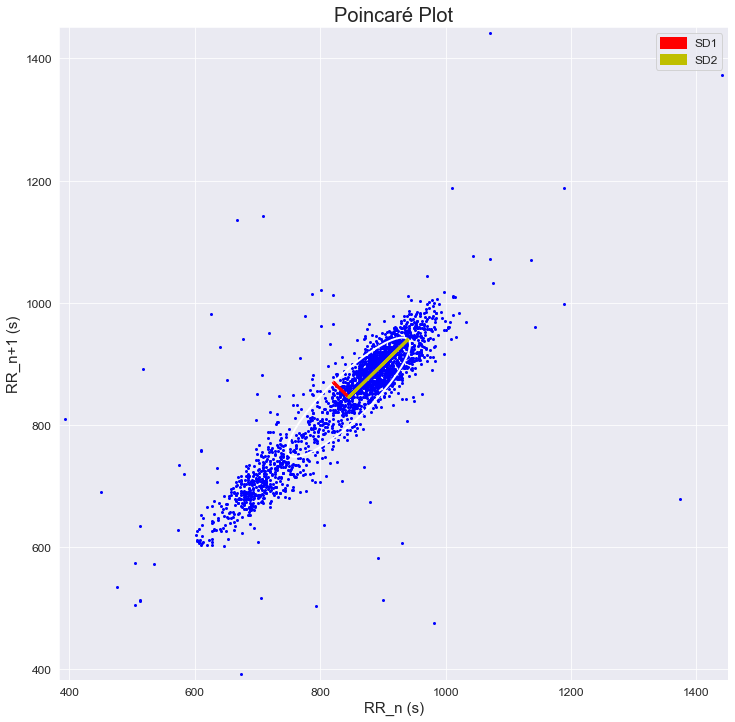

In [10]:
nk.ecg_hrv(bio_df, sampling_rate=1000, show=True)

In [15]:
epochs = nk.epochs_create(bio_df, events=bio_df['RSP_Troughs'], phys_event=True, sampling_rate=1000)

ValueError: Length of passed values is 1877727, index implies 1877726.

In [12]:
results = nk.ecg_analyze(epochs, sampling_rate=1000)

In [13]:
results.keys()

Index(['ECG_Rate_Mean'], dtype='object')

In [14]:
results

,ECG_Rate_Mean
1,81.306076
10,89.523746
100,65.517156
101,65.448602
102,65.613437
...,...
95,66.729397
96,66.393749
97,66.086428
98,65.537847
